In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Loads the aligned trajectory
import MDAnalysis as mda
ref = mda.Universe('protein.pdb')
sim = mda.Universe('protein.pdb', '0/1ubq000_protein.dcd')

# RMSD analysis

Text(0, 0.5, 'RMSD of $\\alpha$ Carbons ($\\AA$)')

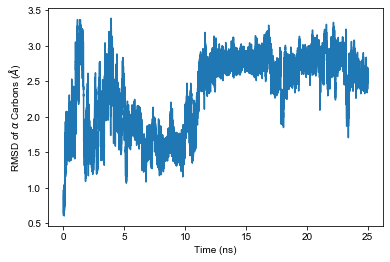

In [3]:
# Evaluate the RMSD of alpha carbons 
# with respect to the reference frame
from MDAnalysis.analysis import rms
R = rms.RMSD(sim, ref, select="protein and name CA")
R.run()
rmsd_CA = R.rmsd

plt.plot(rmsd_CA[:,1]/1000, rmsd_CA[:,2])
plt.xlabel('Time (ns)')
plt.ylabel('RMSD of $\\alpha$ Carbons ($\\AA$)')

Some observations:
* The initial RMSD is low but not zero because minimization changed the structure of the protein relative to the model.
* The largest observed RMSD is less than 3.5 A, which suggests that the protein is relatively stable.
* Other properties appeared to stabilize at the specific value but the RMSD does not, suggesting that there are multiple conformations of the protein and longer simulations would be needed to collect statistics of transitions between them.

Text(0, 0.5, 'RMSD of backbone atoms ($\\AA$)')

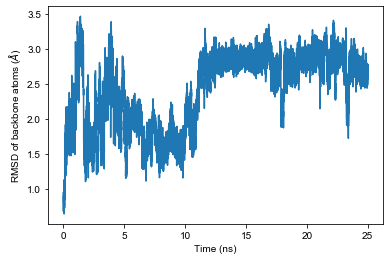

In [4]:
# Evaluate the RMSD of backhone carbons 
# with respect to the reference frame
from MDAnalysis.analysis import rms
R = rms.RMSD(sim, ref, select="backbone")
R.run()
rmsd_backbone = R.rmsd

plt.plot(rmsd_backbone[:,1]/1000, rmsd_backbone[:,2])
plt.xlabel('Time (ns)')
plt.ylabel('RMSD of backbone atoms ($\\AA$)')

(array([ 151., 1242., 4112., 6144., 6841., 3901., 1641.,  736.,  211.,
          21.]),
 array([-0.18731057, -0.15896026, -0.13060996, -0.10225965, -0.07390934,
        -0.04555903, -0.01720873,  0.01114158,  0.03949189,  0.06784219,
         0.0961925 ]),
 <a list of 10 Patch objects>)

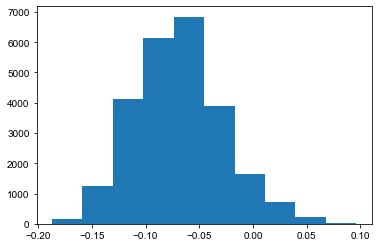

In [5]:
plt.hist(rmsd_CA[:,2] - rmsd_backbone[:,2])

Note that while the RMSD of the alpha carbon atoms and the backbone atoms are similar, they are not precisely the same.

# RMSF analysis

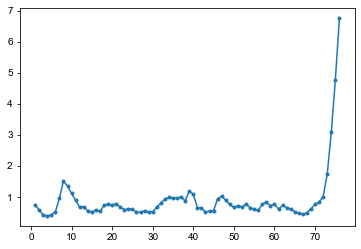

In [6]:
# This code will compute the RMSF relative to the reference structure, 
# not the mean structure.
alpha_carbons = sim.select_atoms("name CA")
R = rms.RMSF(alpha_carbons)
R.run(start=40)

plt.plot(alpha_carbons.resnums, R.rmsf, '.-')

The RMSF analysis suggests that most of the protein is very stable and most of the fluctuations are isolated to the a floppy tail.

Text(0, 0.5, 'RMSD of backbone atoms for residues 1-70 ($\\AA$)')

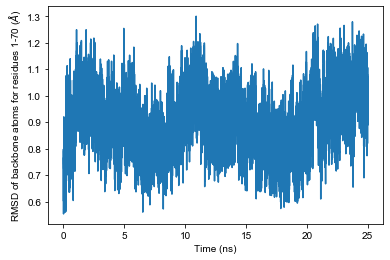

In [7]:
# Evaluate the RMSD of backhone carbons 
# with respect to the reference frame
from MDAnalysis.analysis import rms
R = rms.RMSD(sim, ref, select="backbone and resid 1-70")
R.run()
rmsd_backbone1_70 = R.rmsd

plt.plot(rmsd_backbone1_70[:,1]/1000, rmsd_backbone1_70[:,2])
plt.xlabel('Time (ns)')
plt.ylabel('RMSD of backbone atoms for residues 1-70 ($\\AA$)')

The RMSD of backbone atoms for residues 1-70 supports this belief that most of the fluctuations are of a tail. The RMSD of other atoms is low, less than 1.5 A.